# 移动平均线
*用Python量化你的技术分析*

## 目录
- 均线是什么？
- 不同均线是怎么计算的？
- 均线如何用图表显示？
- 如何用均线构建策略？

## 均线是什么？
均线理论是当今应用最普遍的技术指标之一，它帮助交易者确认现有趋势、判断将出现的趋势、发现过度延生即将反转的趋势。另外均线与趋势是西蒙斯被TED采访时提到的关键词，因此做量化你必须懂，而且是深入地懂这两个词的真正意义。

## 不同均线是怎么计算的？
---

### 1. Simple Moving Average 平滑价格

## $MA_n=\frac{X_1+X_2+...X_n}{n}$

---

### 2. Weighted Moving Average 用权重方法突出前段

## $W_t=\frac{w_1P_{t-n+1}+w_2P_{t-n+2}+...+w_{n-1}P_{t-1}+w_nP_t}{w_1+w_2+...+w_n}$

## $w_1<w_2<...<w_n$

---

### 3. Triangular Moving Average 突出中间,用于周期分析

## $TMA_5=\frac{P_1+2P_2+3P_3+2P_4+P_5}{9}$

---

### 4. Exponential Moving Average 用指数方法突出前段

## $EMA_t=\frac{a^nP_{t-n+1}+a^{n-1}P_{t-n+2}+...+a^2P_{t-1}+aP_t}{a^n+a^{n-1}+...+a^2+a}$

## $EMA_t=α*Price_t + ( 1 - α ) * EMA_{t-1}$

## $α为平滑指数，一般取作2/(n+1)$

---

### 5. Double Exponential Moving Average 突出EMA,减少滞后。

## $DEMA = 2*EMA-EMA(EMA)$

---

### 6. Kaufman Adaptive Moving Average 自适应自适应市场变化与波动

## $ER = Change/Volatility$

## $Change = ABS(Close - Close (10 periods ago))$

## $Volatility = Sum_{10}(ABS(Close_t - Close_{t-1}))$

## $\text{Volatility is the sum of the absolute value of the last ten price changes (Close - Prior Close)}$

## $SC = [ER * (fastest SC - slowest SC) + slowest SC]^2$

## $SC = [ER * (2/(2+1) - 2/(30+1)) + 2/(30+1)]^2$

## $Current KAMA = Prior KAMA + SC * (Price - KAMA_{t-1})$



## 均线如何用图表显示？


In [14]:
import pandas as pd
import warnings
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

data = pd.read_excel('three.xlsx', sheetname='BTCUSDT.binance', index_col='datetime').iloc[-300:]

In [15]:
from talib import abstract
#直接读取DataFrame,默认读取cloumns名为close的数据。
data['close'] = data.close
data['SMA'] = abstract.MA(data, 20)
data['WMA'] = abstract.WMA(data, 20)
data['TRIMA'] = abstract.TRIMA(data, 20)
data['EMA']  = abstract.EMA(data, 20)
data['DEMA'] = abstract.DEMA(data, 20)
data['KAMA'] = abstract.KAMA(data, 20)

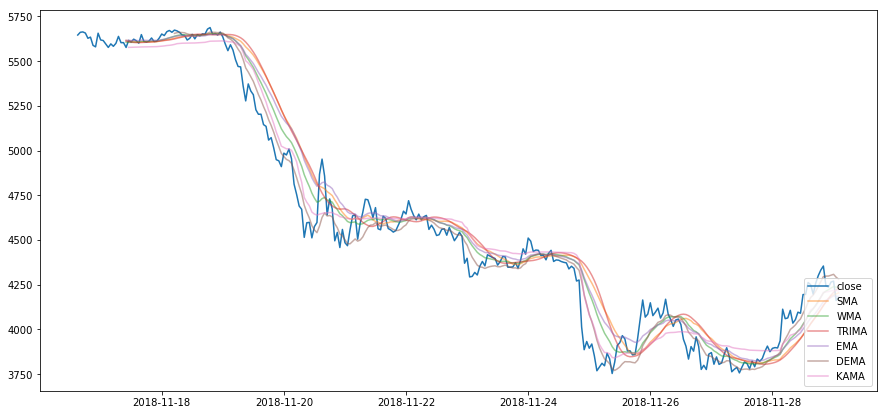

In [16]:

fig = plt.figure(figsize=(15, 7))
plt.plot(data['close'])
plt.plot(data['SMA'], alpha=0.5)
plt.plot(data['WMA'], alpha=0.5)
plt.plot(data['TRIMA'], alpha=0.5)
plt.plot(data['EMA'], alpha=0.5)
plt.plot(data['DEMA'], alpha=0.5)
plt.plot(data['KAMA'], alpha=0.5)
plt.legend(loc='lower right')
plt.show()

## 如何用均线构建策略？
**两条均线的三种交易方法**
1. 当均线金叉（短期大于长期均线）时候买进，死叉（短期小于长期）时卖出。 
2. 当价格上穿两条均线时买入，但价格下穿其中一条均线时卖出。 
3. 当两条均线都处于向上方向时买入，当两条均线都处于下跌方向时卖出。

In [4]:
# 策略参数
fastWindow = 20  # 快速均线参数
slowWindow = 55  # 慢速均线参数

# 指标计算
fastMa = ta.SMA(am60.close, self.fastWindow)
slowMa = ta.SMA(am60.close, self.slowWindow)

# 现象条件
crossOver = (fastMa[-1] > slowMa[-1]) and (fastMa[-2] <= slowMa[-2])
crossBelow = (fastMa[-1] < slowMa[-1]) and (fastMa[-2] >= slowMa[-2])

# 需要避免同时持有多空头寸
# 金叉， 多头无头寸，准备买入进场
if (crossOver) and (self.posDict[symbol + "_LONG"] == 0):
    # 检查空头头寸，为0直接买入进场
    if self.posDict[symbol + "_SHORT"] == 0:
        self.buy(symbol, bar.close*1.02, self.lots)
    # 空头有持仓，先买平再买入进出
    elif self.posDict[symbol + "_SHORT"] > 0:
        self.cover(symbol, bar.close*1.02, self.posDict[symbol + "_SHORT"])
        self.buy(symbol, bar.close*1.02, self.lots)

# 死叉， 空头无头寸，准备卖空进场
elif (crossBelow) and (self.posDict[symbol + "_SHORT"] == 0):
    # 检查多头头寸，为0直接卖出进场
    if self.posDict[symbol + "_LONG"] == 0: 
        self.short(symbol, bar.close*0.98, self.lots)
    # 多头有持仓，先卖平，再卖出进场
    elif self.posDict[symbol + "_LONG"] > 0:
        self.sell(symbol, bar.close*0.98, self.posDict[symbol + "_LONG"])
        self.short(symbol, bar.close*0.98, self.lots)

## 作业：
更换标的与均线类型回测策略。